# Tictactrip - Technical test 

By Vincent DEBANDE

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading data

Let's load our data !

### 1.1 Tickets data

Here are tickets from tictactrip (one row = one ticket) :

- id
- company that assure the journey
- o_station : Station of origin 
- d_station : Station of destination
- departure_ts : departure time
- arrival_ts : arrival_time
- price_in_cents
- search_ts : ? 
- middle_stations : if there are any, list of the stops
- other_companies : a journey can be assured by multiples companies
- o_city : city of origin
- d_city : city of destination

In [2]:
tickets = pd.read_csv("./data/ticket_data.csv")
tickets.fillna(-1, inplace = True)

tickets['o_station'] = tickets['o_station'].astype('int64')
tickets['d_station'] = tickets['d_station'].astype('int64')

tickets

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,-1,-1,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542
1,6795026,9,63,1044,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905,6495,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905,6495,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905,6495,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279,10729,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279,304,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642,304,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279,304,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [3]:
tickets.dtypes

id                  int64
company             int64
o_station           int64
d_station           int64
departure_ts       object
arrival_ts         object
price_in_cents      int64
search_ts          object
middle_stations    object
other_companies    object
o_city              int64
d_city              int64
dtype: object

Since there are some NaN in o_station and d_station, the type is float ! We'll deal with that later if needed.

### 1.2 Cities

Here are all the cities (o_city, d_city in tickets) : 

- id
- local_name : Name of the city, region, country
- unique_name : name of the city (unique) 
- coordinates (latitude / longitude)
- population

In [4]:
cities = pd.read_csv("./data/cities.csv")
cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [5]:
cities.dtypes

id               int64
local_name      object
unique_name     object
latitude       float64
longitude      float64
population     float64
dtype: object

### 1.3 Stations

Here all the stations :

- id : unique number to define a station
- unique_name
- coordinates (latitude / longitude)

In [6]:
stations = pd.read_csv("./data/stations.csv")
stations

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [7]:
stations.dtypes

id               int64
unique_name     object
latitude       float64
longitude      float64
dtype: object

### 1.4 Providers



In [8]:
providers = pd.read_csv("./data/providers.csv")
providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


In [9]:
providers.dtypes

id                       int64
company_id               int64
provider_id             object
name                    object
fullname                object
has_wifi                object
has_plug                object
has_adjustable_seats    object
has_bicycle             object
transport_type          object
dtype: object

## 2. The mission 

I'm asked to extract several informations about the trajects : 

- Minimum/maximum/average price
- Minimum/maximum/average duration

- Difference of price and duration between transport type and length of the journey

### 2.1 Trajects 

Let's define a traject as following : 

A traject is a journey from a city of origin (o_city) to a city of destination (d_city)

In [10]:
trajects = tickets.groupby(['o_city','d_city']).count()
trajects

id  company  o_station  d_station  departure_ts  arrival_ts  \
o_city d_city                                                                 
5      23        5        5          5          5             5           5   
6      227       2        2          2          2             2           2   
       504      30       30         30         30            30          30   
       628       4        4          4          4             4           4   
       845     201      201        201        201           201         201   
...            ...      ...        ...        ...           ...         ...   
11938  126      72       72         72         72            72          72   
12124  1064      2        2          2          2             2           2   
12166  857       1        1          1          1             1           1   
12190  639      18       18         18         18            18          18   
       8937      1        1          1          1             1           1   

               price_in_cents  search_ts  middle_stations  other_companies  
o_city d_city                                                               
5      23                   5          5                5                5  
6      227                  2          2                2                2  
       504                 30         30               30               30  
       628                  4          4                4                4  
       845                201        201              201              201  
...                       ...        ...              ...              ...  
11938  126                 72         72               72               72  
12124  1064                 2          2                2                2  
12166  857                  1          1                1                1  
12190  639                 18         18               18               18  
       8937                 1          1                1                1  

[1437 rows x 10 columns]

We can see that we have 1437 different trajects ! 

### 2.2 Analysis of trajects

#### 2.2.1 Prices

In order to get statistics on the trajets we can group by all the tickets by **o_city** and **d_city**. 
Then, we can apply functions on the grouped lines. Since we want to compute multiple statistics for each group, we can use .agg() function !

In [11]:
trajects = tickets.groupby(['o_city','d_city'])[['price_in_cents']].agg(['min','max','mean', 'count'])
trajects

price_in_cents                           
                         min    max          mean count
o_city d_city                                          
5      23              18600  22000  20320.000000     5
6      227              9860  13650  11755.000000     2
       504              2000   8920   4042.666667    30
       628              2600   3190   2797.500000     4
       845               700   2420    864.626866   201
...                      ...    ...           ...   ...
11938  126              3000   5350   4204.861111    72
12124  1064             6000   7900   6950.000000     2
12166  857              5300   5300   5300.000000     1
12190  639               600    850    688.888889    18
       8937             9800   9800   9800.000000     1

[1437 rows x 4 columns]

#### Get the prices for a given traject

With the following function, you can print the prices for a given traject :

- With a city of origin, it'll give you the stats about the price of all the trajects from the city 
- With both origin and destination, it'll give you the stat of a specific traject 

In [12]:
def pricePerTraject(originCity, destinationCity = None):
    if(destinationCity == None):
        return trajects.loc[[originCity]]
    else:
        return trajects.loc[(originCity,destinationCity),:]
    
print(pricePerTraject(6))

              price_in_cents                           
                         min    max          mean count
o_city d_city                                          
6      227              9860  13650  11755.000000     2
       504              2000   8920   4042.666667    30
       628              2600   3190   2797.500000     4
       845               700   2420    864.626866   201
       10480            3700   4050   3833.333333     6


#### 2.2.2 Time

We want for each traject some statiscts about the duration ! 

First, we need to convert the string into a datetime, let's use pd.to_datetime().
Then, we'll do a **group by** and an **aggregation** !

In [149]:
tickets['departure_ts'] = pd.to_datetime(tickets['departure_ts'])
tickets['arrival_ts'] = pd.to_datetime(tickets['arrival_ts'])

tickets.dtypes

id                               int64
company                          int64
o_station                        int64
d_station                        int64
departure_ts       datetime64[ns, UTC]
arrival_ts         datetime64[ns, UTC]
price_in_cents                   int64
search_ts          datetime64[ns, UTC]
middle_stations                 object
other_companies                 object
o_city                           int64
d_city                           int64
travel_ts              timedelta64[ns]
dtype: object

In [14]:
# Let's compute the travel time
tickets['travel_ts'] = tickets['arrival_ts'] - tickets['departure_ts']
tickets

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_ts
0,6795025,8385,-1,-1,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542,0 days 06:10:00
1,6795026,9,63,1044,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00
2,6795027,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00
3,6795028,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00
4,6795029,8381,5905,6495,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279,10729,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00
74164,6869185,9,279,304,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00
74165,6869187,8371,10642,304,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00
74166,6869189,13,279,304,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00


In [15]:
# We check the types of the new columns
tickets.dtypes

id                               int64
company                          int64
o_station                        int64
d_station                        int64
departure_ts       datetime64[ns, UTC]
arrival_ts         datetime64[ns, UTC]
price_in_cents                   int64
search_ts                       object
middle_stations                 object
other_companies                 object
o_city                           int64
d_city                           int64
travel_ts              timedelta64[ns]
dtype: object

In [16]:
trajects_Time = tickets.groupby(['o_city','d_city'])[['travel_ts']].agg(['min','max', 'sum', 'count'])
trajects_Time = trajects_Time['travel_ts']

# We round the timedelta to the second !
trajects_Time['mean'] = (trajects_Time['sum']/trajects_Time['count']).round('s')

# Since we already computed the mean, we can drop the sum column
trajects_Time = trajects_Time.drop('sum', 1)

trajects_Time

min             max  count            mean
o_city d_city                                                       
5      23     0 days 08:53:00 0 days 15:54:00      5 0 days 10:18:48
6      227    0 days 12:24:00 0 days 15:01:00      2 0 days 13:42:30
       504    0 days 05:36:00 0 days 12:20:00     30 0 days 08:17:24
       628    0 days 09:40:00 0 days 14:30:00      4 0 days 12:10:00
       845    0 days 01:00:00 0 days 04:11:00    201 0 days 01:19:55
...                       ...             ...    ...             ...
11938  126    0 days 05:30:00 1 days 11:20:00     72 0 days 07:25:17
12124  1064   0 days 11:10:00 0 days 23:10:00      2 0 days 17:10:00
12166  857    0 days 21:55:00 0 days 21:55:00      1 0 days 21:55:00
12190  639    0 days 01:10:00 0 days 02:40:00     18 0 days 01:28:53
       8937   0 days 09:10:00 0 days 09:10:00      1 0 days 09:10:00

[1437 rows x 4 columns]

#### Get the travel time for a given traject

With the following function, you can print the travel time for a given traject :

- With a city of origin, it'll give you the stats about the travel time of all the trajects from the city 
- With both origin and destination, it'll give you the stat of a specific traject 

In [17]:
def timePerTrajects(originCity, destinationCity = None):
    if(destinationCity == None):
        return trajects_Time.loc[[originCity]]
    else:
        return trajects_Time.loc[(originCity,destinationCity),:]
    
print(timePerTrajects(6))

                          min             max  count            mean
o_city d_city                                                       
6      227    0 days 12:24:00 0 days 15:01:00      2 0 days 13:42:30
       504    0 days 05:36:00 0 days 12:20:00     30 0 days 08:17:24
       628    0 days 09:40:00 0 days 14:30:00      4 0 days 12:10:00
       845    0 days 01:00:00 0 days 04:11:00    201 0 days 01:19:55
       10480  0 days 05:00:00 0 days 08:00:00      6 0 days 05:50:00


### 2.3 Comparison between transport types based on length of the journey

Now we have to compute the deltas of the prices et duration based on the transport type and the number of km of the trajects. 

#### Transport type

To get the transport type use during a traject, we have to link tickets with providers. 

For tickets with multiple companies, we'll check if there are multiple types of transports. If there are, we'll ignore the ticket because we don't have the details of the journey (price and duration per sub journey).

In [18]:
tickets2 = tickets.copy()

In [19]:
def getTransportType(company, other_companies):
    if(other_companies == -1):
        return providers[providers['id'] == company]['transport_type']
    else:
        other_companies = set(map(int, other_companies[1:-1].split(',')))
        transport = providers[providers['id'] == company][['transport_type']].iloc[0]['transport_type']
        for company in other_companies:
            transport2 = providers[providers['id'] == company][['transport_type']].iloc[0]['transport_type']
            if(transport != transport2):
                return None
        return transport

In [20]:
tickets2['transport_type'] = tickets2.apply(lambda x: getTransportType(x['company'], x['other_companies']), axis = 1)

tickets2

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_ts,transport_type
0,6795025,8385,-1,-1,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542,0 days 06:10:00,carpooling
1,6795026,9,63,1044,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,bus
2,6795027,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,train
3,6795028,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,train
4,6795029,8381,5905,6495,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279,10729,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00,bus
74164,6869185,9,279,304,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00,bus
74165,6869187,8371,10642,304,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00,bus
74166,6869189,13,279,304,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00,bus


In [21]:
tickets2.count()

id                 74168
company            74168
o_station          74168
d_station          74168
departure_ts       74168
arrival_ts         74168
price_in_cents     74168
search_ts          74168
middle_stations    74168
other_companies    74168
o_city             74168
d_city             74168
travel_ts          74168
transport_type     73885
dtype: int64

In [22]:
tickets2.dropna(inplace = True)
tickets2.count()

id                 73885
company            73885
o_station          73885
d_station          73885
departure_ts       73885
arrival_ts         73885
price_in_cents     73885
search_ts          73885
middle_stations    73885
other_companies    73885
o_city             73885
d_city             73885
travel_ts          73885
transport_type     73885
dtype: int64

Since very few lines have multiple transport type, we could drop them. 

We can see in the preview of the dataframe that every time a row hasn't 'middle_stations', it hasn't 'o_station' and 'd_station'. Let's check if it's correct (it'll make our computation of the distance a little bit easier).

It could be interesting to see the distribution of transport_type ! 

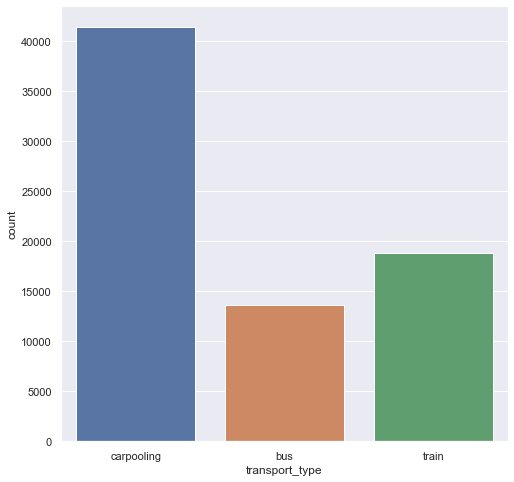

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,8))
ax = sns.countplot(x="transport_type", data=tickets2)

There are way more trajects by carpooling than bus and train combined !

It could be interesting to understand why :

On the following plot we can see that trajects by **carpooling** tends to be **less expensive** than the other types of transportation (not an explanation, just a fact). 

<AxesSubplot:xlabel='price_in_cents', ylabel='Density'>

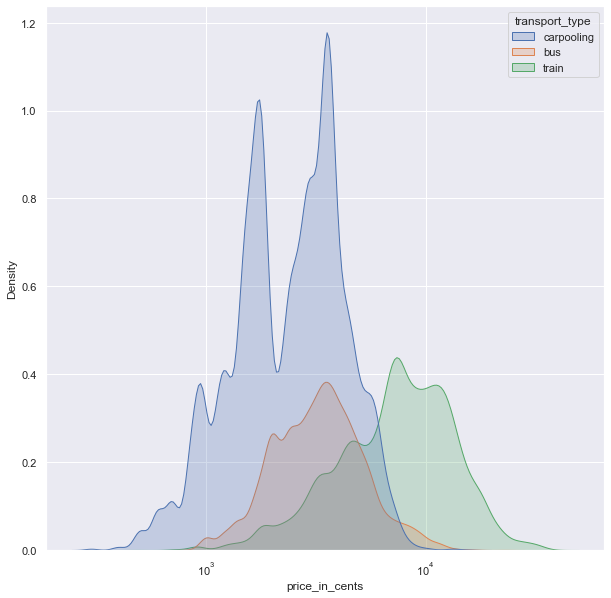

In [93]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=tickets2, x="price_in_cents", hue = "transport_type", shade = True, log_scale = True)

In [25]:
def checkMiddle_o_d_stations(middle_stations, o_station, d_station):
    if(middle_stations != -1):
        if(o_station != -1 & d_station != -1):
            return True
        return False
    if(middle_stations == -1):
        if(o_station == -1 & d_station == -1):
            return True
        return False
    
testStations = tickets2.apply(lambda x: checkMiddle_o_d_stations(x['middle_stations'], x['o_station'], x['d_station']), axis = 1 )

all(testStations)

True

Nice! Now we know that if there is 'middle_stations', there are 'o_station' and 'd_station'. 

#### Distance

First, let's compute the distance. 

If we don't have any middle station we compute the distance between the **city of origin and the city of destination**. 
If there are middle stations, **we need to take them into account in the computation of the distance.**

Let's check how many trajects exists (including middle stations, o_station and d_station)

In [26]:
trajects_Test = tickets2.groupby(['o_city','d_city', 'middle_stations', 'o_station', 'd_station']).count()
trajects_Test.index

MultiIndex([(    5,   23,                     '{6797,1898}',   562,   269),
            (    6,  227,                       '{527,527}',  3653,   575),
            (    6,  227, '{6635,6635,470,470,10895,10895}',  3653,   575),
            (    6,  504,                                -1,    -1,    -1),
            (    6,  504,                     '{1044,1044}',    16,   763),
            (    6,  504,                       '{527,527}',    16,   334),
            (    6,  504,                       '{527,527}',    16,   763),
            (    6,  504,                       '{527,527}',    16, 10030),
            (    6,  504,                       '{527,527}',  3653,   334),
            (    6,  504,                     '{6242,6242}',  3653,   334),
            ...
            (11835,  246,                                -1,    -1,    -1),
            (11835,  485,                                -1,    -1,    -1),
            (11938,  126,                                -1,    -1,    -

Well, there are 6614 distances to compute (better than 74168)

Let's do this ! 

In [27]:
from math import sin, cos, sqrt, atan2, radians

# Method to compute distance from lat-lon coordinates 

def distanceCoord(lat1, lon1, lat2, lon2):
    R = 6373.0 # Approcimate radius of earth, in km
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def computeKmTrajects(o_city, d_city, middle_stations = -1, o_station = -1, d_station = 1):
    if(middle_stations != -1):
        dist = 0
        # We get the IDs of the middle stations in a set in order to get unique ids (as int) 
        middle_stations = set(map(int, middle_stations[1:-1].split(',')))
        
        # We compute the distance between every station
        previous_station = o_station
        for station in middle_stations:
            s1_lat_long = stations[stations['id'] == previous_station][['latitude','longitude']]    
            s2_lat_long = stations[stations['id'] == station][['latitude','longitude']]     

            dist += round(distanceCoord(s1_lat_long.latitude, s1_lat_long.longitude, s2_lat_long.latitude, s2_lat_long.longitude))
            previous_station = station
        
        s_lat_long = stations[stations['id'] == previous_station][['latitude','longitude']]  
        d_lat_long = stations[stations['id'] == d_station][['latitude','longitude']]
        
        # We compute the distance between the n-1 et n station ! Then return distance 
        dist += round(distanceCoord(s_lat_long.latitude, s_lat_long.longitude, d_lat_long.latitude, d_lat_long.longitude))
        return dist
        
    else:
        o_lat_long = cities[cities['id'] == o_city][['latitude','longitude']]
        d_lat_long = cities[cities['id'] == d_city][['latitude','longitude']]
        
        dist = round(distanceCoord(o_lat_long.latitude, o_lat_long.longitude, d_lat_long.latitude, d_lat_long.longitude))
        
        return dist

In [28]:
# We store the computed distances in a dictionary, as key : o_city, d_city, middle_stations, o_station, d_station
# as value: the distance

distances = dict()

for trajects in trajects_Test.index:
    distances[trajects] = computeKmTrajects(trajects[0], trajects[1], trajects[2], trajects[3], trajects[4])

In [29]:
def assignDistance(o_city, d_city, middle_stations = -1, o_station = -1, d_station = -1):
    return distances[(o_city,d_city,middle_stations,o_station,d_station)]

In [30]:
tickets2['travel_km'] = tickets2.apply(lambda x: assignDistance(x['o_city'], x['d_city'], x['middle_stations'], x['o_station'], x['d_station']), axis = 1)
tickets2

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_ts,transport_type,travel_km
0,6795025,8385,-1,-1,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542,0 days 06:10:00,carpooling,503
1,6795026,9,63,1044,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,bus,506
2,6795027,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,train,753
3,6795028,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,train,753
4,6795029,8381,5905,6495,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,train,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279,10729,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00,bus,346
74164,6869185,9,279,304,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00,bus,340
74165,6869187,8371,10642,304,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00,bus,344
74166,6869189,13,279,304,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00,bus,372


Now that we have the transport time and the transport type, we can move on !

The next thing to do is to make categories from travel_km

In [31]:
tickets2['travel_km_cat'] = pd.cut(x=tickets2['travel_km'], bins = [0, 200, 800, 2000, np.inf], labels = [1,2,3,4], include_lowest = True)
tickets2

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_ts,transport_type,travel_km,travel_km_cat
0,6795025,8385,-1,-1,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542,0 days 06:10:00,carpooling,503,2
1,6795026,9,63,1044,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,0 days 17:50:00,bus,506,2
2,6795027,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1 days 07:57:00,train,753,2
3,6795028,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,0 days 21:35:00,train,753,2
4,6795029,8381,5905,6495,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,0 days 21:46:00,train,630,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279,10729,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,0 days 13:30:00,bus,346,2
74164,6869185,9,279,304,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:30:00,bus,340,2
74165,6869187,8371,10642,304,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,0 days 06:45:00,bus,344,2
74166,6869189,13,279,304,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,0 days 07:45:00,bus,372,2


Now that we have all the information we need (transport type and distance), we can proceed !

We can observe that for every transport type, there is the same relation between the number of km and the price :

- The more km, the bigger price

For **carpooling** we can see that we can have long trips for a reasonable price compared to the bus and train. 
The train is obviously the more expensive based on the number of km.
The bus is the less expensive based on the number ok km. 

Carpooling can be less expensive than the bus, but we saw in the density graph that the price's ranges of the bus are included in the carpooling ones. 

So, there is another factor to determine why carpooling is the most used transport type.

One hypothesis is the ratio travel_km/travel_time

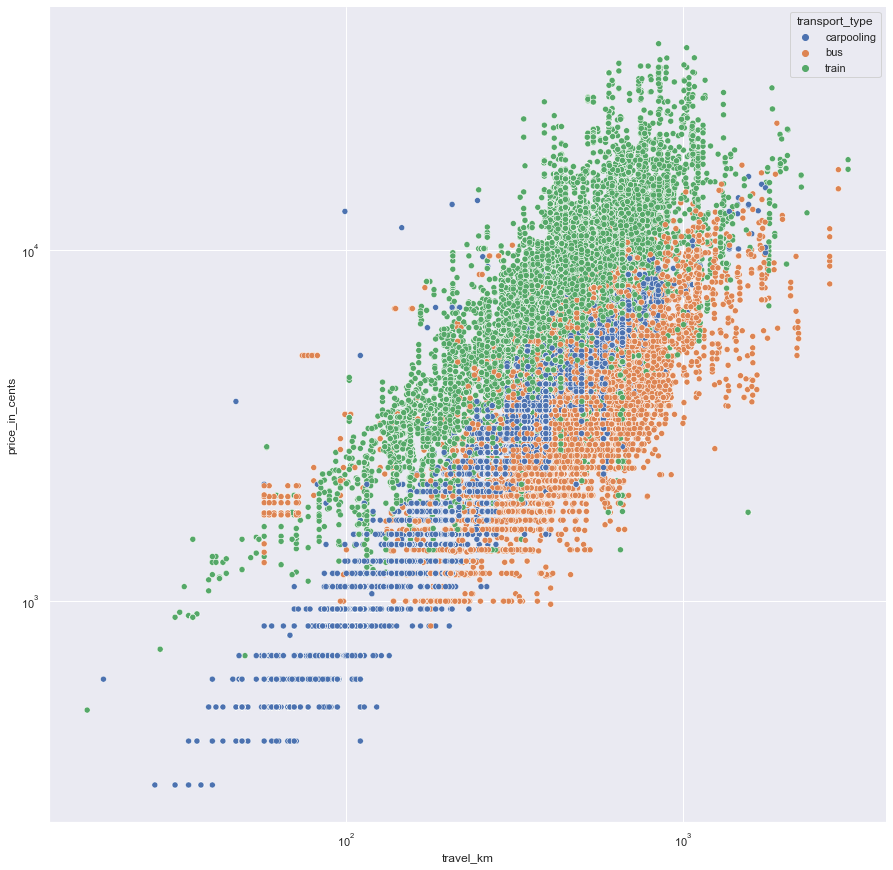

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

splot = sns.scatterplot(x="travel_km", y="price_in_cents", hue="transport_type",
            data=tickets2, ax = ax)
splot.set(xscale = 'log')
splot.set(yscale = 'log')
sns.despine()

In the two following plots, we can see that traject by carpooling are in general the fastest but also the shorter in term of km. 

- **Carpooling** has the fastest trajects and travels different distances (most of them shorter than the other transports, but it covers all of their ranges)
- **Train** is in between carpooling and bus in terms of time and travels mostly moderate to long distances
- **Bus** has the slowest trajects, it seems that it travels the same distances than the train

<AxesSubplot:xlabel='ts', ylabel='Density'>

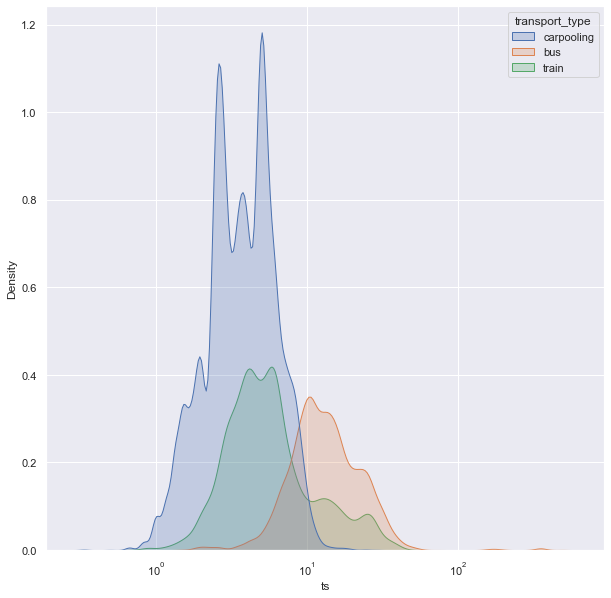

In [94]:
tickets2['ts'] = (tickets2.travel_ts.values.astype(np.int64) // 10 ** 9) / 3600

plt.figure(figsize=(10,10))
sns.kdeplot(data=tickets2, x="ts", hue = "transport_type", shade = True, log_scale = True)


<AxesSubplot:xlabel='travel_km', ylabel='Density'>

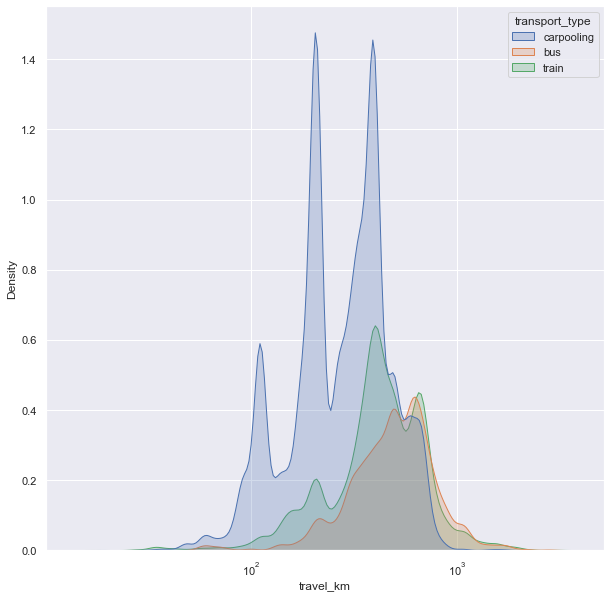

In [96]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=tickets2, x="travel_km", hue = "transport_type", shade = True, log_scale = True)

In [35]:
transport_travel = tickets2.groupby(['transport_type','travel_km_cat'])[['price_in_cents','travel_ts', 'travel_km']].agg(['min','max', 'sum', 'count'])
transport_travel.columns = transport_travel.columns.map('_'.join)
transport_travel = transport_travel.reset_index()

transport_travel

,transport_type,travel_km_cat,price_in_cents_min,price_in_cents_max,price_in_cents_sum,price_in_cents_count,travel_ts_min,travel_ts_max,travel_ts_sum,travel_ts_count,travel_km_min,travel_km_max,travel_km_sum,travel_km_count
0,bus,1,850.0,7800.0,1045026.0,547,0 days 01:28:00,13 days 05:45:00,177 days 22:13:00,547,57.0,200.0,76828.0,547
1,bus,2,980.0,12800.0,38956848.0,11679,0 days 04:00:00,20 days 12:51:00,7192 days 22:56:00,11679,201.0,800.0,5736220.0,11679
2,bus,3,2290.0,22900.0,9110804.0,1379,0 days 11:50:00,14 days 17:00:00,1520 days 02:01:00,1379,801.0,1971.0,1437218.0,1379
3,bus,4,5000.0,16890.0,202960.0,24,0 days 22:20:00,8 days 02:10:00,38 days 04:55:00,24,2082.0,2888.0,57338.0,24
4,carpooling,1,300.0,12850.0,12340950.0,10330,0 days 00:20:00,0 days 17:20:00,851 days 03:20:00,10330,19.0,200.0,1386371.0,10330
5,carpooling,2,850.0,13800.0,100063800.0,30968,0 days 01:20:00,0 days 19:50:00,6168 days 16:40:00,30968,202.0,789.0,11186588.0,30968
6,carpooling,3,4496.0,16150.0,1233596.0,143,0 days 07:50:00,1 days 05:10:00,78 days 01:20:00,143,804.0,1755.0,142348.0,143
7,carpooling,4,NaN,NaN,NaN,0,NaT,NaT,NaT,0,NaN,NaN,NaN,0
8,train,1,490.0,8120.0,6099990.0,2059,0 days 00:39:00,1 days 10:04:00,368 days 22:56:00,2059,17.0,200.0,296627.0,2059
9,train,2,1400.0,33900.0,138147590.0,15607,0 days 01:08:00,2 days 00:27:00,4785 days 06:05:00,15607,202.0,800.0,7127591.0,15607


In [36]:
# compute the mean price

transport_travel['price_in_cents_mean'] = round(transport_travel['price_in_cents_sum']/transport_travel['price_in_cents_count'])

# drop unnecessary columns
transport_travel = transport_travel.drop(['price_in_cents_sum'], 1)

In [37]:
# compute the mean travel time
transport_travel['travel_ts_mean'] = (transport_travel['travel_ts_sum']/transport_travel['travel_ts_count']).round('s')

# drop unnecessary columns and rename to prepare for the join. 
transport_travel.drop(['travel_ts_sum'], 1, inplace = True)

In [38]:
# compute the mean travel km
transport_travel['travel_km_mean'] = round(transport_travel['travel_km_sum']/transport_travel['travel_km_count'])

# drop unnecessary columns and rename to prepare for the join. 
transport_travel.drop(['travel_km_sum','travel_km_min','travel_km_max'], 1, inplace = True)

In [39]:
transport_travel['ts_mean_h'] = (transport_travel.travel_ts_mean.values.astype(np.int64) // 10 ** 9) / 3600
transport_travel.iloc[7,12] = 0.0000001
transport_travel

transport_travel['speed_mean'] = transport_travel['travel_km_mean']/transport_travel['ts_mean_h']

transport_travel

,transport_type,travel_km_cat,price_in_cents_min,price_in_cents_max,price_in_cents_count,travel_ts_min,travel_ts_max,travel_ts_count,travel_km_count,price_in_cents_mean,travel_ts_mean,travel_km_mean,ts_mean_h,speed_mean
0,bus,1,850.0,7800.0,547,0 days 01:28:00,13 days 05:45:00,547,547,1910.0,0 days 07:48:24,140.0,7.806667e+00,17.933390
1,bus,2,980.0,12800.0,11679,0 days 04:00:00,20 days 12:51:00,11679,11679,3336.0,0 days 14:46:53,491.0,1.478139e+01,33.217447
2,bus,3,2290.0,22900.0,1379,0 days 11:50:00,14 days 17:00:00,1379,1379,6607.0,1 days 02:27:19,1042.0,2.645528e+01,39.387226
3,bus,4,5000.0,16890.0,24,0 days 22:20:00,8 days 02:10:00,24,24,8457.0,1 days 14:12:18,2389.0,3.820500e+01,62.531082
4,carpooling,1,300.0,12850.0,10330,0 days 00:20:00,0 days 17:20:00,10330,10330,1195.0,0 days 01:58:39,134.0,1.977500e+00,67.762326
5,carpooling,2,850.0,13800.0,30968,0 days 01:20:00,0 days 19:50:00,30968,30968,3231.0,0 days 04:46:51,361.0,4.780833e+00,75.509848
6,carpooling,3,4496.0,16150.0,143,0 days 07:50:00,1 days 05:10:00,143,143,8627.0,0 days 13:06:01,995.0,1.310028e+01,75.952588
7,carpooling,4,NaN,NaN,0,NaT,NaT,0,0,NaN,NaT,NaN,1.000000e-07,NaN
8,train,1,490.0,8120.0,2059,0 days 00:39:00,1 days 10:04:00,2059,2059,2963.0,0 days 04:18:02,144.0,4.300556e+00,33.484046
9,train,2,1400.0,33900.0,15607,0 days 01:08:00,2 days 00:27:00,15607,15607,8852.0,0 days 07:21:31,457.0,7.358611e+00,62.104111


In this graph, we can see that all the traject are mainly in the categorie 2 of travel_km (distance is in [200;800]).
As seen before, *carpooling is the main transport type* and is also used for shorter trips !

[Text(0, 0.5, 'number of tickets')]

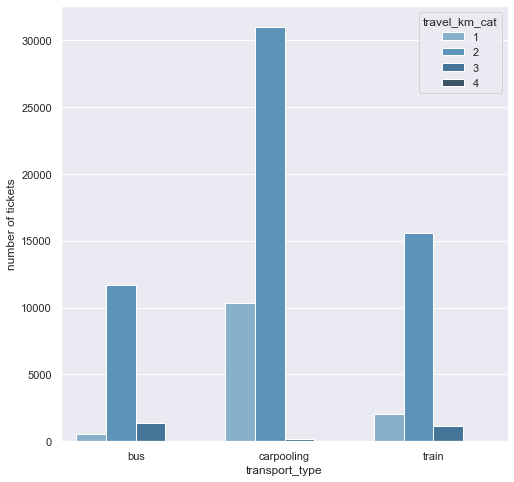

In [40]:
plt.figure(figsize=(8,8))
g = sns.barplot(x="transport_type", y="price_in_cents_count", hue="travel_km_cat", data=transport_travel, palette="Blues_d")
g.set(ylabel = "number of tickets")

Train is the *most expensive* transport type. 

Carpooling *is less expensive than the bus for short trips*, but when it comes to *longer trips, the bus is less expensive*.

<AxesSubplot:xlabel='transport_type', ylabel='price_in_cents_mean'>

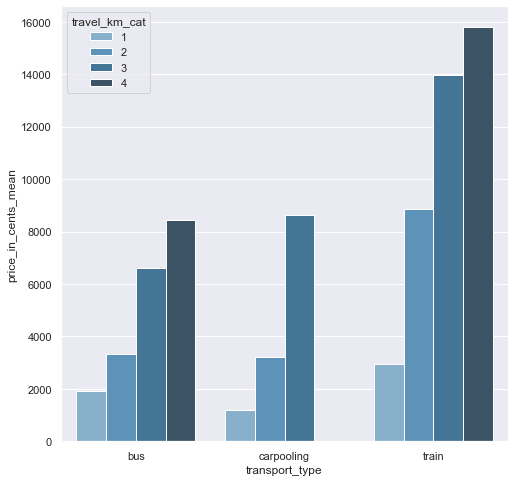

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(x="transport_type", y="price_in_cents_mean", hue="travel_km_cat", data=transport_travel, palette="Blues_d")

As expected, the *bus has the longest trips*. 

*Carpooling has shorter trips* than the train (but it does not mean it's faster). 

*The train is more efficient than the bus for long trips !*

<AxesSubplot:xlabel='transport_type', ylabel='ts_mean_h'>

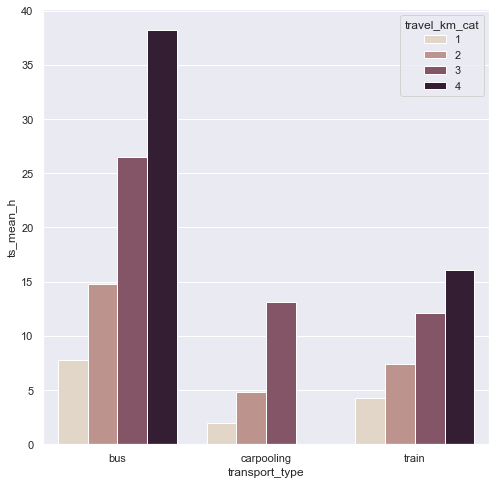

In [42]:
plt.figure(figsize=(8,8))
sns.barplot(x="transport_type", y="ts_mean_h", hue="travel_km_cat", palette="ch:.25", data=transport_travel)

We can see that the *bus is slow* compared to other transport types. 
The slowest mean of carpooling is higher than the highest mean speed of the bus. 

As expected, the *train is way faster for long trips*.

<AxesSubplot:xlabel='transport_type', ylabel='speed_mean'>

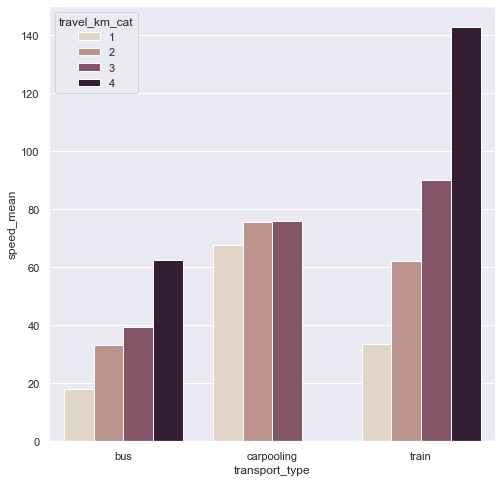

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x="transport_type", y="speed_mean", hue="travel_km_cat", palette="ch:.25", data=transport_travel)

In conclusion, we can see why **carpooling** is the most used transport type : 

- Its price is reasonable and its speed is significantly higher than the bus. 

The **train** is used for longer trips and will be faster than the car. 

Carpooling is the best compromise for a **relatively fast and unexpensive trip** !

## 3. Machine Learning 

Now that we made an analyse of our data and we know it a little better, let's do some Machine Learning ! 
The goal here is to **predict prices** of a traject given some parameters. 

Let's take a look to the structure of our dataframe. We have : 

- 3 quantitative data (price_in_cents, travel_km, ts)
- 3 dates

- 8 qualitative data (IDs + transport_type)

No question to ask about the quantitative columns. 

But now **how to treat the dates, the IDs and the transport type ?**

In [173]:
data = tickets2.copy()
data.drop(['travel_km_cat', 'travel_ts', 'id'], 1, inplace = True)
data

,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,transport_type,travel_km,ts
0,8385,-1,-1,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542,carpooling,503,6.166667
1,9,63,1044,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,bus,506,17.833333
2,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,train,753,31.950000
3,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,train,753,21.583333
4,8381,5905,6495,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,train,630,21.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,13,279,10729,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,bus,346,13.500000
74164,9,279,304,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,bus,340,6.500000
74165,8371,10642,304,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,bus,344,6.750000
74166,13,279,304,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,bus,372,7.750000


### 3.1 Data encoding 

We don't have any frequencies, levels or steps in our data (such as travel_km_cat which is qualitative data but stills holds levels/ranges of distances), so we have to treat our variables as nominal variables

#### 3.1.1 Label encoding

For IDs, we can keep them that way, through those IDs, cities names have been label encoded. 
For transport_type, since we only got 3 categories, we'll one hot encode them : 

- We'll make 3 columns : transport_carpooling, transport_train, transport_bus with boolean in it

In [174]:
data = pd.get_dummies(data, columns = ["transport_type"], prefix=["transport"])
data

,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,travel_km,ts,transport_bus,transport_carpooling,transport_train
0,8385,-1,-1,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,-1,-1,611,542,503,6.166667,0,1,0
1,9,63,1044,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,506,17.833333,1,0,0
2,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,753,31.950000,0,0,1
3,8377,5905,6495,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,753,21.583333,0,0,1
4,8381,5905,6495,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,630,21.766667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,13,279,10729,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,346,13.500000,1,0,0
74164,9,279,304,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,340,6.500000,1,0,0
74165,8371,10642,304,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,344,6.750000,1,0,0
74166,13,279,304,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,372,7.750000,1,0,0


#### 3.1.2 Date encoding

Since we have the time travel, from departure or arival, we can compute the other one. So they are {departure, ts} or {arrival, ts} is higly correlated with {arrival} or {departure}. 

We'll keep departure time. 

Now, what do we want to retrieve from this information ?

Maybe the week in the day, the month and the hour. 

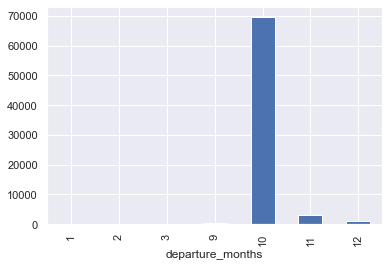

In [175]:
data.drop('arrival_ts', 1, inplace = True)
data['departure_months'] = data['departure_ts'].dt.month
dataMonth = data.groupby('departure_months').count().company.plot.bar()

Alright, since most of the trajects are taking place in october, the month information is useless. 

In [176]:
data.drop('departure_months', 1, inplace = True)

What about the day in the week ? 

<AxesSubplot:xlabel='departure_day'>

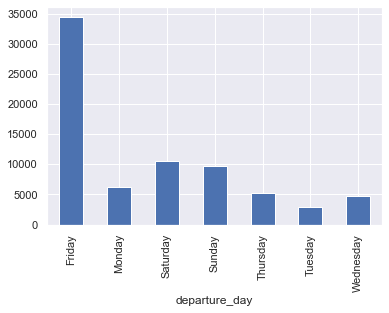

In [177]:
data['departure_day'] = data['departure_ts'].dt.day_name()

data.groupby('departure_day').count().company.plot.bar()

It looks like we've got most of departure friday, but we also got some the week-end.
Based on the followign graph the prices are about the same every day, so we won't keep this information. 

I also introduced Spearman's correlation (read more : https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/) in order to compute how much two variables are linked :

"A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation."

0.06848476319461529


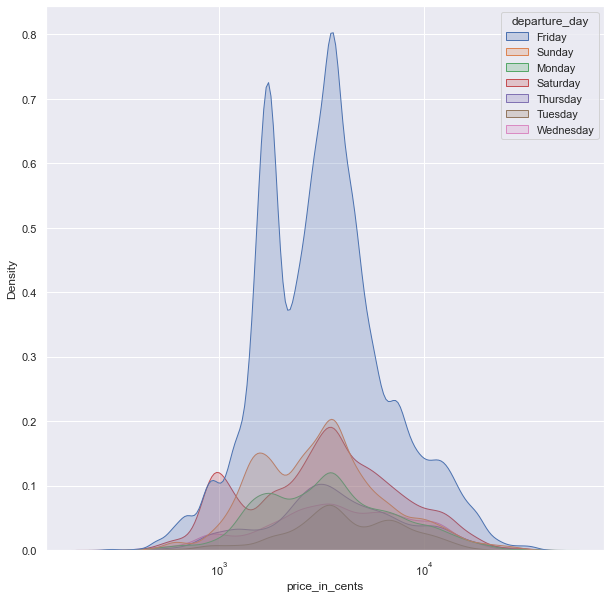

In [178]:
test = data[['departure_day','price_in_cents']]

plt.figure(figsize=(10,10))
g = sns.kdeplot(data=test, x="price_in_cents", hue = "departure_day", shade = True, log_scale = True)

cor, _ = spearmanr(data['departure_day'],data['price_in_cents'])
print(cor)

data.drop('departure_day', 1, inplace = True)

correlation:  -0.12568456523977717


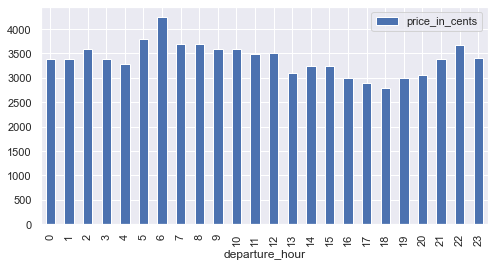

In [179]:
data['departure_hour'] = data['departure_ts'].dt.hour
test = data[['departure_hour','price_in_cents']]

test.groupby('departure_hour').median().plot.bar(figsize=(8,4))

cor, _ = spearmanr(data['departure_hour'],data['price_in_cents'])
print("correlation: ", cor)

data.drop(['departure_hour','departure_ts'], 1, inplace = True)

We saw that the hour of departure is not relevant to determine the price of a traject. 

Let's do the same thing for search_ts!

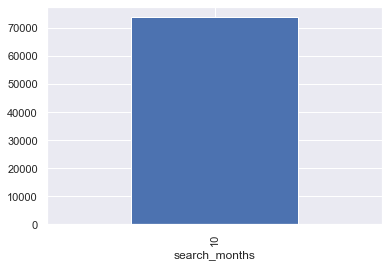

In [180]:
data['search_ts'] = pd.to_datetime(data['search_ts'])

data['search_months'] = data['search_ts'].dt.month

dataMonth = data.groupby('search_months').count().company.plot.bar()

data.drop('search_months', 1, inplace = True)

correlation:  0.03217142417670553


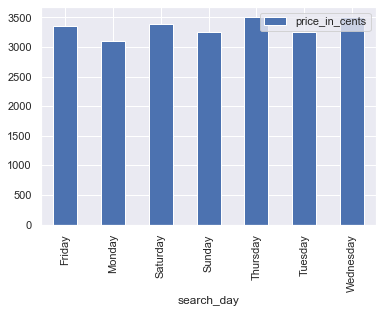

In [181]:
data['search_day'] = data['search_ts'].dt.day_name()

test = data[['search_day','price_in_cents']]

cor, _ = spearmanr(data['search_day'],data['price_in_cents'])
print("correlation: ", cor)

dataMonth = test.groupby('search_day').median().plot.bar()

data.drop('search_day', 1, inplace = True)

correlation:  0.06411503451859288


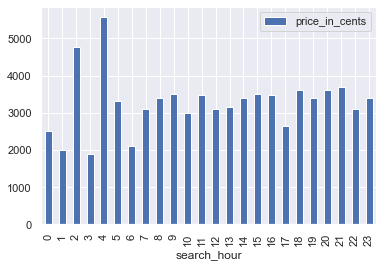

In [182]:
data['search_hour'] = data['search_ts'].dt.hour

test = data[['search_hour','price_in_cents']]

cor, _ = spearmanr(data['search_hour'],data['price_in_cents'])
print("correlation: ", cor)

dataMonth = test.groupby('search_hour').median().plot.bar()

data.drop('search_hour', 1, inplace = True)

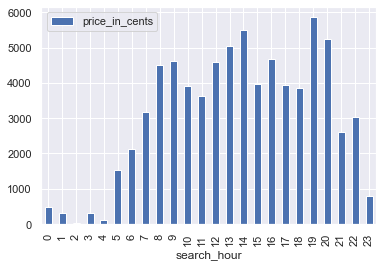

In [183]:
dataMonth = test.groupby('search_hour').count().plot.bar()

After all, we won't use any dates as features !

In [185]:
data.drop('search_ts', 1, inplace = True)
data

,company,o_station,d_station,price_in_cents,middle_stations,other_companies,o_city,d_city,travel_km,ts,transport_bus,transport_carpooling,transport_train
0,8385,-1,-1,4550,-1,-1,611,542,503,6.166667,0,1,0
1,9,63,1044,1450,"{149,418}",{13},611,542,506,17.833333,1,0,0
2,8377,5905,6495,7400,"{798,798,6794,6246}","{8377,8376}",611,542,753,31.950000,0,0,1
3,8377,5905,6495,13500,"{798,798,6794,6246}","{8377,8376}",611,542,753,21.583333,0,0,1
4,8381,5905,6495,7710,"{5983,5983}",{8380},611,542,630,21.766667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,13,279,10729,2590,"{408,408}",{8371},628,562,346,13.500000,1,0,0
74164,9,279,304,2700,"{1105,1105}",{9},628,562,340,6.500000,1,0,0
74165,8371,10642,304,3000,"{1105,1105}",{9},628,562,344,6.750000,1,0,0
74166,13,279,304,2880,"{863,863}",{13},628,562,372,7.750000,1,0,0
